# Econometria Aplicada

## Aula 2 - Regressão linear múltipla e formas funcionais



João Ricardo Costa Filho \\
[joaocostafilho.com](https://)

## A regressão linear múltipla

**Motivação**: \\

Qual é o efeito da educação nos salários dos trabalhadores??

Vamos utilizar os dados do livro do Wooldrige e a aplicação em R do livro do Heiss. \\

* Heiss, F. (2020). Using R for introductory econometrics (pp. 216-217). Düsseldorf, Germany, 2nd edition.

### Pacotes

In [ ]:
install.packages("wooldridge")           # pacote para obter os dados do livro Introductory Econometrics: A Modern Approach, 7e by Jeffrey M. Wooldridge

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(wooldridge)

### Dados

In [ ]:
data(wage1) # base de dados

In [ ]:
?wage1

In [ ]:
head( wage1, 20 )

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,⋯,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,3.10,11,2,0,0,1,0,2,1,0,⋯,0,0,0,0,0,0,0,1.131402,4,0
2,3.24,12,22,2,0,1,1,3,1,0,⋯,0,0,1,0,0,0,1,1.175573,484,4
3,3.00,11,2,0,0,0,0,2,0,0,⋯,0,1,0,0,0,0,0,1.098612,4,0
4,6.00,8,44,28,0,0,1,0,1,0,⋯,0,0,0,0,0,1,0,1.791759,1936,784
5,5.30,12,7,2,0,0,1,1,0,0,⋯,0,0,0,0,0,0,0,1.667707,49,4
6,8.75,16,9,8,0,0,1,0,1,0,⋯,0,0,0,1,1,0,0,2.169054,81,64
7,11.25,18,15,7,0,0,0,0,1,0,⋯,0,1,0,0,1,0,0,2.420368,225,49
8,5.00,12,5,3,0,1,0,0,1,0,⋯,0,0,0,0,1,0,0,1.609438,25,9
9,3.60,12,26,4,0,1,0,2,1,0,⋯,0,1,0,0,1,0,0,1.280934,676,16


In [ ]:
str( wage1 ) # estrutura dos dados

'data.frame':	526 obs. of  24 variables:
 $ wage    : num  3.1 3.24 3 6 5.3 ...
 $ educ    : int  11 12 11 8 12 16 18 12 12 17 ...
 $ exper   : int  2 22 2 44 7 9 15 5 26 22 ...
 $ tenure  : int  0 2 0 28 2 8 7 3 4 21 ...
 $ nonwhite: int  0 0 0 0 0 0 0 0 0 0 ...
 $ female  : int  1 1 0 0 0 0 0 1 1 0 ...
 $ married : int  0 1 0 1 1 1 0 0 0 1 ...
 $ numdep  : int  2 3 2 0 1 0 0 0 2 0 ...
 $ smsa    : int  1 1 0 1 0 1 1 1 1 1 ...
 $ northcen: int  0 0 0 0 0 0 0 0 0 0 ...
 $ south   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ west    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ construc: int  0 0 0 0 0 0 0 0 0 0 ...
 $ ndurman : int  0 0 0 0 0 0 0 0 0 0 ...
 $ trcommpu: int  0 0 0 0 0 0 0 0 0 0 ...
 $ trade   : int  0 0 1 0 0 0 1 0 1 0 ...
 $ services: int  0 1 0 0 0 0 0 0 0 0 ...
 $ profserv: int  0 0 0 0 0 1 0 0 0 0 ...
 $ profocc : int  0 0 0 0 0 1 1 1 1 1 ...
 $ clerocc : int  0 0 0 1 0 0 0 0 0 0 ...
 $ servocc : int  0 1 0 0 0 0 0 0 0 0 ...
 $ lwage   : num  1.13 1.18 1.1 1.79 1.67 ...
 $ expersq : int  

## Visualização dos dados

In [ ]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


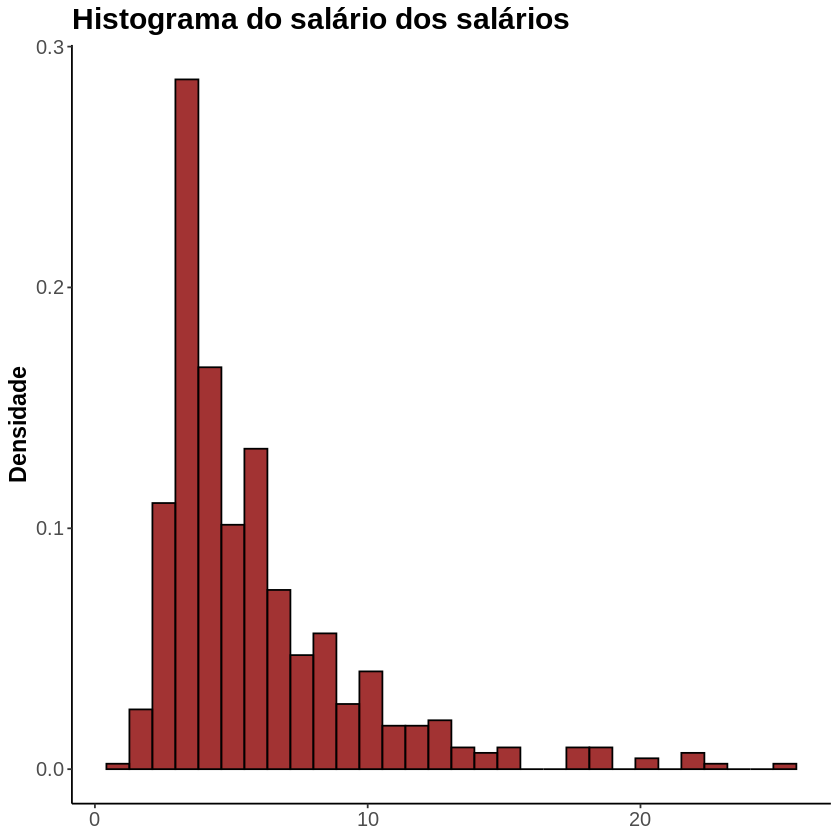

In [ ]:
ggplot( wage1 ) +
  geom_histogram(aes(x = wage, y = ..density..), color = "black", fill = "darkred", alpha = 0.8) +
    labs(title = "Histograma dos salários", x = NULL, y = "Densidade") +
  theme_classic() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    strip.text = element_text(size = 12, face = "bold")
  )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


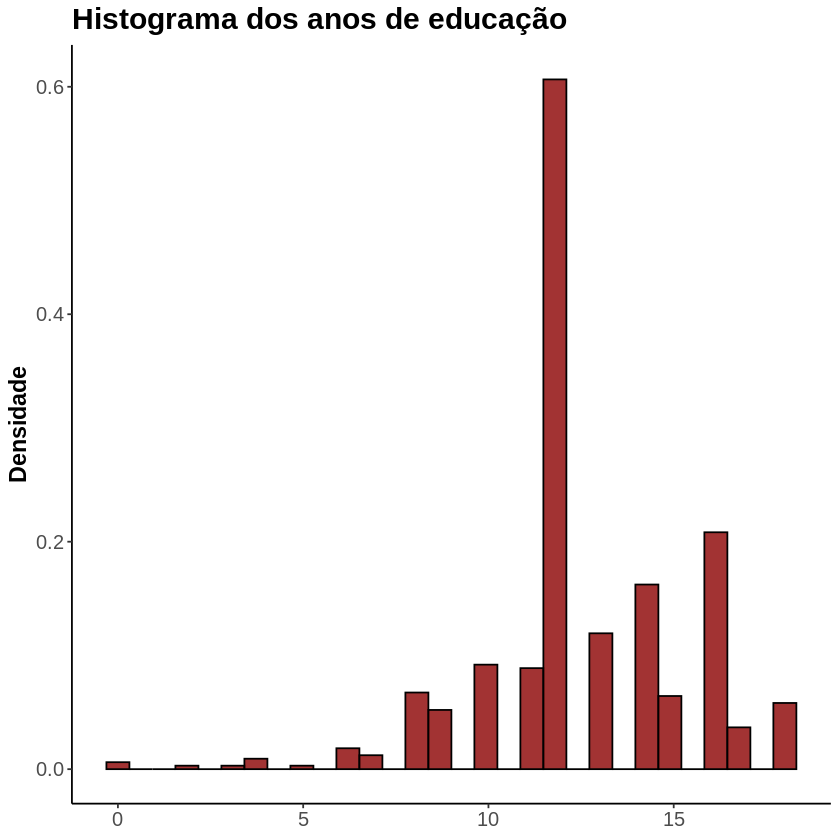

In [ ]:
ggplot( wage1 ) +
  geom_histogram(aes(x = educ, y = ..density..), color = "black", fill = "darkred", alpha = 0.8) +
    labs(title = "Histograma dos anos de educação", x = NULL, y = "Densidade") +
  theme_classic() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    strip.text = element_text(size = 12, face = "bold")
  )

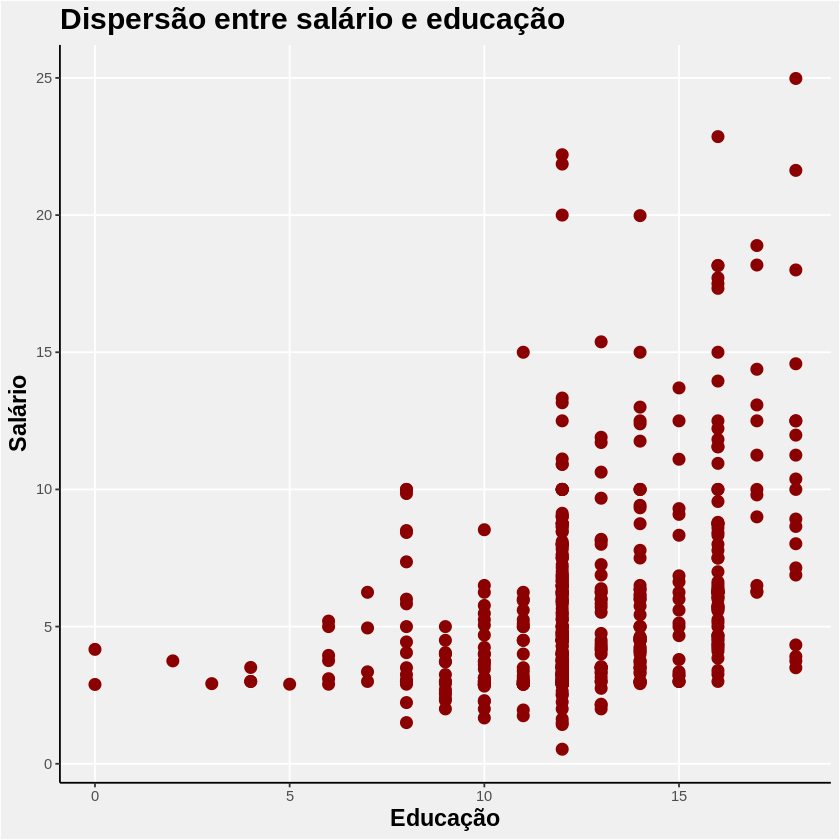

In [ ]:
ggplot( wage1, aes( x = educ, y = wage ) ) +
  geom_point( color = 'darkred', size = 3 ) + 
  labs(title = "Dispersão entre salário e educação",
       x = "Educação",
       y = "Salário") +
         theme_classic() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold")
        ) +
  theme(panel.background = element_rect(fill = "#f0f0f0"),
        plot.background = element_rect(fill = "#f0f0f0"),
        panel.grid.major = element_line(colour = "white") )

Estatísticas descritivas

In [ ]:
attach( wage1 )

In [ ]:
# Apenas para fins pedagógicos, vamos criar uma tabela com estatísticas descritivas da seguinte forma:

tabela = matrix( data = NA, ncol = 2, nrow = 4 )

colnames( tabela ) = c( "Salário", "Educação" )
rownames( tabela ) = c( "Média", "Variância", "Desvio-padrão", "Coeficiente de Variação" )

# média
tabela[1,1] = round( mean( wage ), 2 )
tabela[1,2] = round( mean( educ ), 2 )

# variância
tabela[2,1] = round( var( wage ), 2 )
tabela[2,2] = round( var( educ ), 2 )

# desvio-padrão
tabela[3,1] = round( sd( wage ), 2 )
tabela[3,2] = round( sd( educ ), 2 )

# coeficiente de variação
tabela[4,1] = round( sd( wage ) / mean( wage ), 2 )
tabela[4,2] = round( sd( educ ) / mean( educ ), 2 )

print( tabela )

                        Salário Educação
Média                      5.90    12.56
Variância                 13.64     7.67
Desvio-padrão              3.69     2.77
Coeficiente de Variação    0.63     0.22


In [ ]:
# Covariância (amostral)

print('Covariância entre salários e educação')

round( cov( wage, educ ), 2 )

[1] "Covariância entre salários e educação"


[1] 4.15

In [ ]:
# Correlação (amostral)

print('Correlação entre salários e educação')

round( cor( wage, educ ), 2 )

[1] "Correlação entre salários e educação"


[1] 0.41

### Regressão

Queremos estimar a seguinte regressão: \\
\
$salario_i = \beta_0 + \beta_1 Educ_i + ɛ_i$


In [ ]:
reg = lm( wage ~ educ, data = wage1)

summary( reg )


Call:
lm(formula = wage ~ educ, data = wage1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3396 -2.1501 -0.9674  1.1921 16.6085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.90485    0.68497  -1.321    0.187    
educ         0.54136    0.05325  10.167   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.378 on 524 degrees of freedom
Multiple R-squared:  0.1648,	Adjusted R-squared:  0.1632 
F-statistic: 103.4 on 1 and 524 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


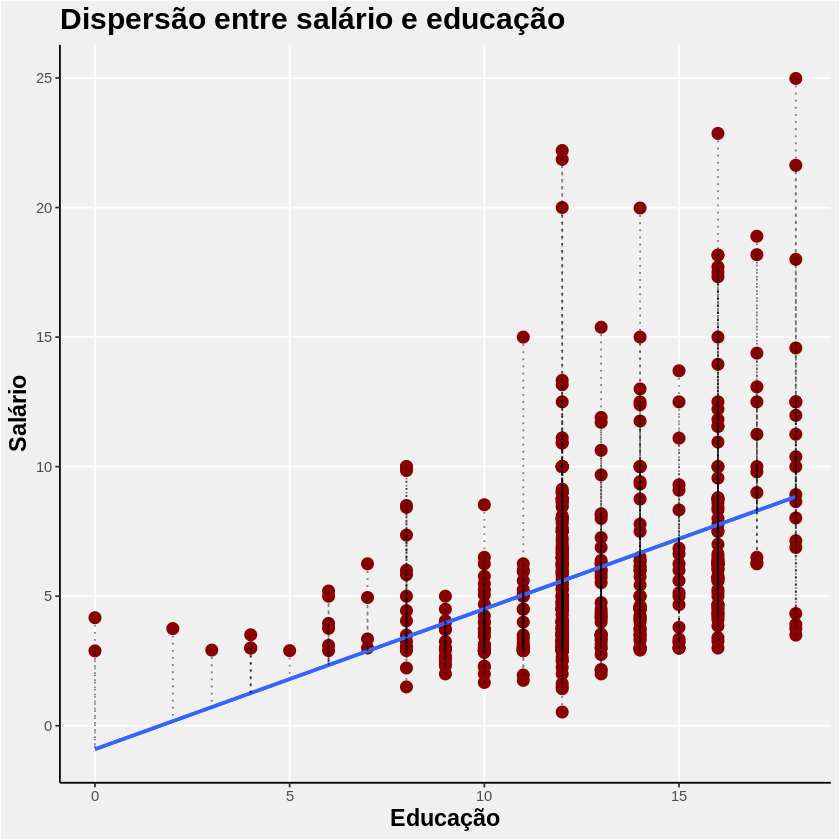

In [ ]:
ggplot(wage1, aes( x = educ, y = wage ) ) +
  geom_point( color = 'darkred', size = 3 ) + 
  labs(title = "Dispersão entre salário e educação",
       x = "Educação",
       y = "Salário") +
         theme_classic() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold")
        ) +
  theme(panel.background = element_rect(fill = "#f0f0f0"),
        plot.background = element_rect(fill = "#f0f0f0"),
        panel.grid.major = element_line(colour = "white") ) +
    stat_smooth(method = lm, se = FALSE) + 
     geom_smooth(method = lm, se = FALSE, fullrange = TRUE) +
  geom_segment(aes(x = educ, y = wage,
                   xend = educ, yend = predict(lm(wage ~ educ, data = wage1))),
               alpha = 0.5, linetype = "dotted")  


Ou seja, a relação que estimamos é tal que:

$\hat{salario} = -0.9049 + 0.5414 \text{ }Educ$.

Sendo assim, qual é o valor do salário **esperado** de um trabalhador com 5 anos de educação? E de um trabalhador com 10 anos? E com 20 anos?

In [ ]:
s1 = reg$coefficients[1] + reg$coefficients[2] * 5
print( "Salário esperado de um trabalhador com 5 anos de educação")
round( s1, 2 ) 
print("")
print("")

s2 = reg$coefficients[1] + reg$coefficients[2] * 10
print( "Salário esperado de um trabalhador com 10 anos de educação")
round( s2, 2 )
print("")
print("")

s3 = reg$coefficients[1] + reg$coefficients[2] * 20
print( "Salário esperado de um trabalhador com 20 anos de educação")
round( s3, 2 )


Call:
lm(formula = wage ~ educ, data = wage1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3396 -2.1501 -0.9674  1.1921 16.6085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.90485    0.68497  -1.321    0.187    
educ         0.54136    0.05325  10.167   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.378 on 524 degrees of freedom
Multiple R-squared:  0.1648,	Adjusted R-squared:  0.1632 
F-statistic: 103.4 on 1 and 524 DF,  p-value: < 2.2e-16


### Resíduos

Vamos olhar para as estatísticas referentes aos resíduos agora.

In [ ]:
wage_hat = fitted( reg )

e_hat = resid( reg )

Por hipótese, temos que $E[\varepsilon] = 0$

In [ ]:
round( mean( e_hat ), 10 )

[1] 0

Por hipótese, temos que $Cov[ \varepsilon_i, X_i ] = 0 \implies \rho( \varepsilon_i,  X_i) = 0$

In [ ]:
round(cor( educ, e_hat ), 10 )

[1] 0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


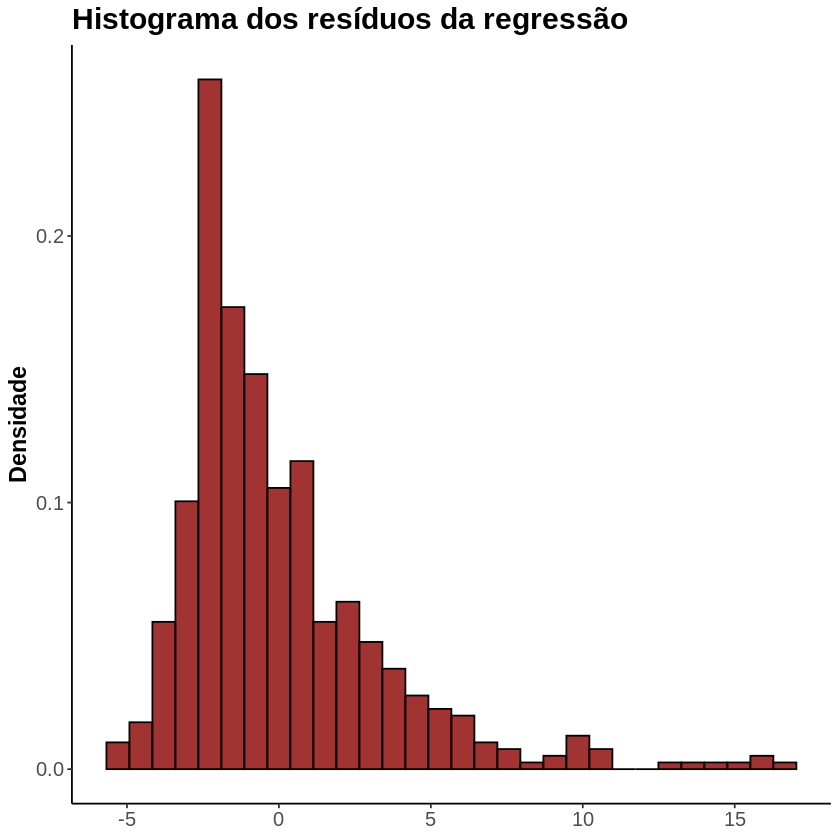

In [ ]:
resid = data.frame( e_hat )

ggplot( resid ) +
  geom_histogram(aes(x = e_hat, y = ..density..), color = "black", fill = "darkred", alpha = 0.8) +
    labs(title = "Histograma dos resíduos da regressão", x = NULL, y = "Densidade") +
  theme_classic() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    strip.text = element_text(size = 12, face = "bold")
  )

## Inferência

A relação entre salários e educação é estatísticamente significativa? 

Para $\hat{ \beta}_1$: 

$\mathcal{H}_0: \beta_1 = 0$ \\
$\mathcal{H}_a: \beta_1 \neq 0$ \\

In [ ]:
reg = lm( wage ~ educ, data = wage1)

summary( reg )


Call:
lm(formula = wage ~ educ, data = wage1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3396 -2.1501 -0.9674  1.1921 16.6085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.90485    0.68497  -1.321    0.187    
educ         0.54136    0.05325  10.167   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.378 on 524 degrees of freedom
Multiple R-squared:  0.1648,	Adjusted R-squared:  0.1632 
F-statistic: 103.4 on 1 and 524 DF,  p-value: < 2.2e-16


Se α = 5%, rejeitamos a hipótese nula de $\beta_{1} = 0$.

E a significância conjunta?

\begin{equation*}
\begin{aligned}
& \mathcal{H}_0: \beta_0 = \beta_1 = 0  \\
& \mathcal{H}_a: \beta_j \neq 0, \text{ para } j = [0,1]
\end{aligned}
\end{equation*}

Se α = 5%, rejeitamos a hipótese nula de $\beta_0 = \beta_1 = 0$.

### Regressão linear múltipla

E se quisermos estimar a seguinte equação?

$salario_i = \beta_0 + \beta_1 Educ_i + \beta_2 Exper_i + ɛ_i$

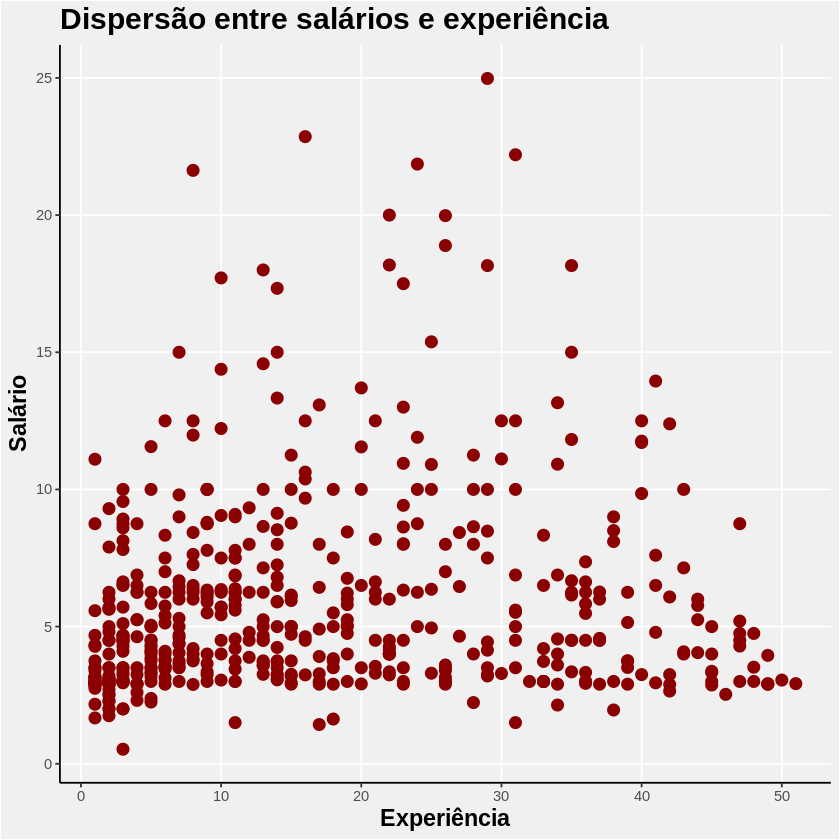

In [ ]:
ggplot( wage1, aes( x = exper, y = wage ) ) +
  geom_point( color = 'darkred', size = 3 ) + 
  labs(title = "Dispersão entre salários e experiência",
       x = "Experiência",
       y = "Salário") +
         theme_classic() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold")
        ) +
  theme(panel.background = element_rect(fill = "#f0f0f0"),
        plot.background = element_rect(fill = "#f0f0f0"),
        panel.grid.major = element_line(colour = "white") )

In [ ]:
reg = lm( wage ~ educ + exper, data = wage1)

summary( reg )


Call:
lm(formula = wage ~ educ + exper, data = wage1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5532 -1.9801 -0.7071  1.2030 15.8370 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.39054    0.76657  -4.423 1.18e-05 ***
educ         0.64427    0.05381  11.974  < 2e-16 ***
exper        0.07010    0.01098   6.385 3.78e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.257 on 523 degrees of freedom
Multiple R-squared:  0.2252,	Adjusted R-squared:  0.2222 
F-statistic: 75.99 on 2 and 523 DF,  p-value: < 2.2e-16


## Formas funcionais e não-linearidades

* Termo quadrático

In [ ]:
reg = lm( wage ~ educ + exper + expersq, data = wage1)

summary( reg )


Call:
lm(formula = wage ~ educ + exper + expersq, data = wage1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0692 -2.0837 -0.5417  1.2860 15.1363 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.964890   0.752153  -5.271 1.99e-07 ***
educ         0.595343   0.053025  11.228  < 2e-16 ***
exper        0.268287   0.036897   7.271 1.31e-12 ***
expersq     -0.004612   0.000822  -5.611 3.26e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.166 on 522 degrees of freedom
Multiple R-squared:  0.2692,	Adjusted R-squared:  0.265 
F-statistic: 64.11 on 3 and 522 DF,  p-value: < 2.2e-16


* (Semi-)Elasticidade

In [ ]:
reg = lm( log( wage ) ~ educ + log( exper ), data = wage1)

summary( reg )


Call:
lm(formula = log(wage) ~ educ + log(exper), data = wage1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.98572 -0.30098 -0.01989  0.27637  1.38347 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.012082   0.110699   0.109    0.913    
educ        0.096139   0.007203  13.347   <2e-16 ***
log(exper)  0.168481   0.018720   9.000   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4472 on 523 degrees of freedom
Multiple R-squared:  0.295,	Adjusted R-squared:  0.2923 
F-statistic: 109.4 on 2 and 523 DF,  p-value: < 2.2e-16


* Dummy

In [ ]:
reg = lm( log( wage ) ~ educ + log( exper ) + married, data = wage1)

summary( reg )


Call:
lm(formula = log(wage) ~ educ + log(exper) + married, data = wage1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.94918 -0.29762 -0.02574  0.29815  1.35531 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.047376   0.110869   0.427  0.66933    
educ        0.092577   0.007287  12.704  < 2e-16 ***
log(exper)  0.141993   0.021125   6.722 4.72e-11 ***
married     0.119787   0.045182   2.651  0.00826 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4446 on 522 degrees of freedom
Multiple R-squared:  0.3044,	Adjusted R-squared:  0.3004 
F-statistic: 76.13 on 3 and 522 DF,  p-value: < 2.2e-16
